In [18]:
import pandas as pd
import numpy as np
import itertools #confusion matrix
import string
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
#To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('./data/drugsComTrain_raw.tsv', sep='\t')

In [5]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [6]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [7]:
df_condition = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2') | (df['condition']=='Insomnia') | (df['condition']=='Bipolar Disorde') | (df['condition']=='Abnormal Uterine Bleeding')]

In [8]:
df_condition.shape

(52725, 7)

In [9]:
df.shape

(161297, 7)

### Exploratory Data Analysis

In [10]:
df_condition = df_condition.drop(['Unnamed: 0','drugName','rating','date','usefulCount'], axis = 1)

In [11]:
df_condition.condition.value_counts()

condition
Birth Control                28788
Depression                    9069
Bipolar Disorde               4224
Insomnia                      3673
Diabetes, Type 2              2554
High Blood Pressure           2321
Abnormal Uterine Bleeding     2096
Name: count, dtype: int64

In [16]:
df_condition_birth = df_condition[(df_condition['condition'] == 'Birth Control')]
df_condition_depr = df_condition[(df_condition['condition'] == 'Depression')]
df_condition_bipolar = df_condition[(df_condition['condition'] == 'Bipolar Disorde')]
df_condition_insomnia = df_condition[(df_condition['condition'] == 'Insomnia')]
df_condition_diab = df_condition[(df_condition['condition'] == 'Diabetes, Type 2')]
df_condition_diab = df_condition[(df_condition['condition'] == 'Abnormal Uterine Bleeding')]

Text(0.5, 1.0, 'Word Cloud on Birth Control Condition')

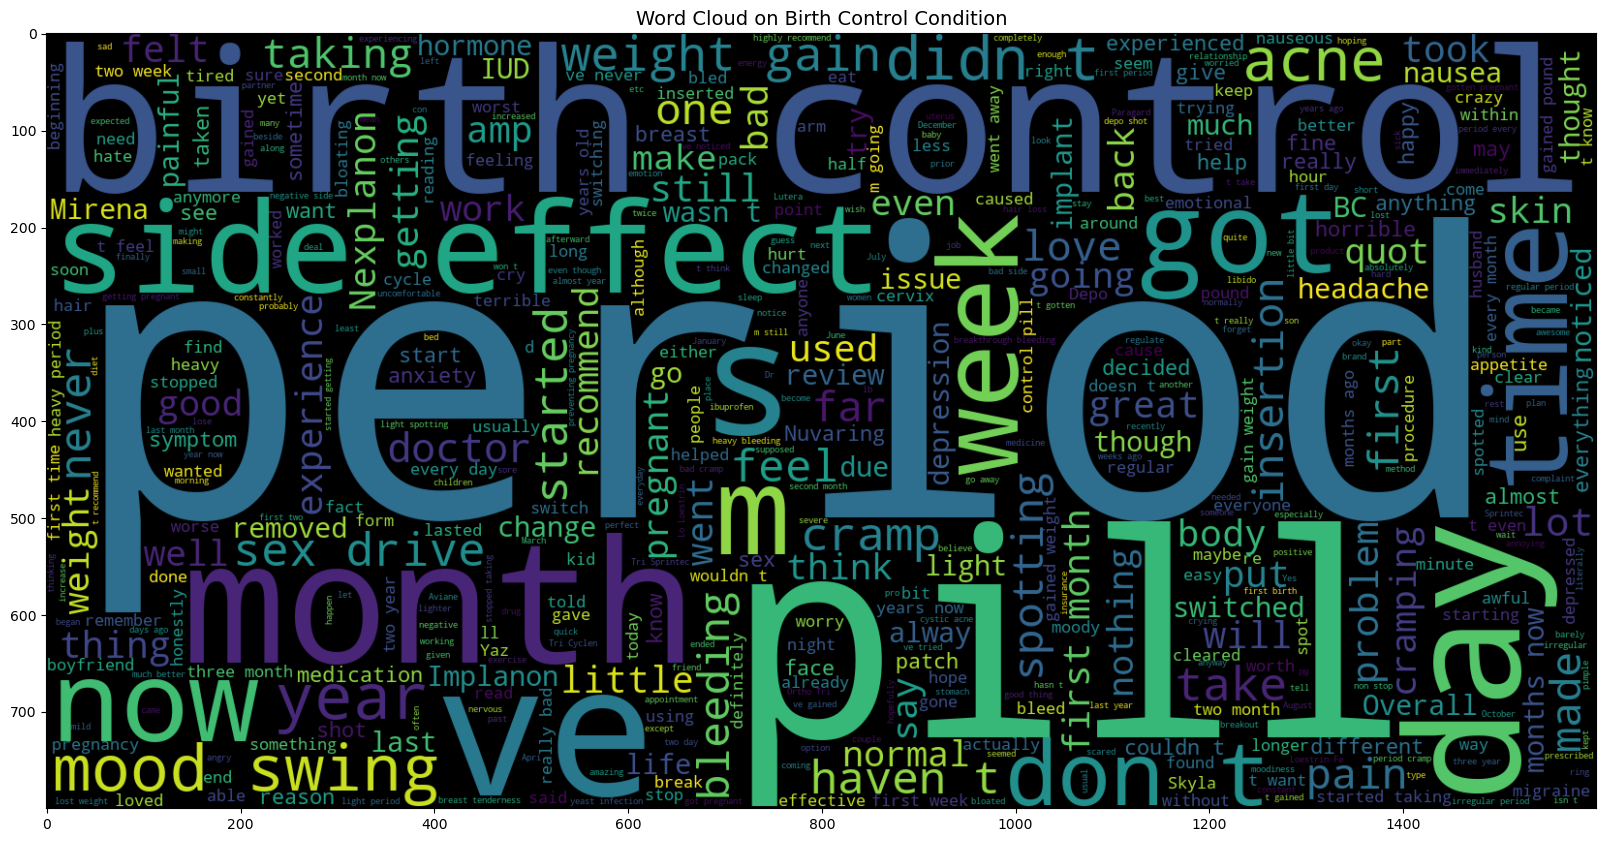

In [19]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(df_condition_birth.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud on Birth Control Condition', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud on Depression Condition')

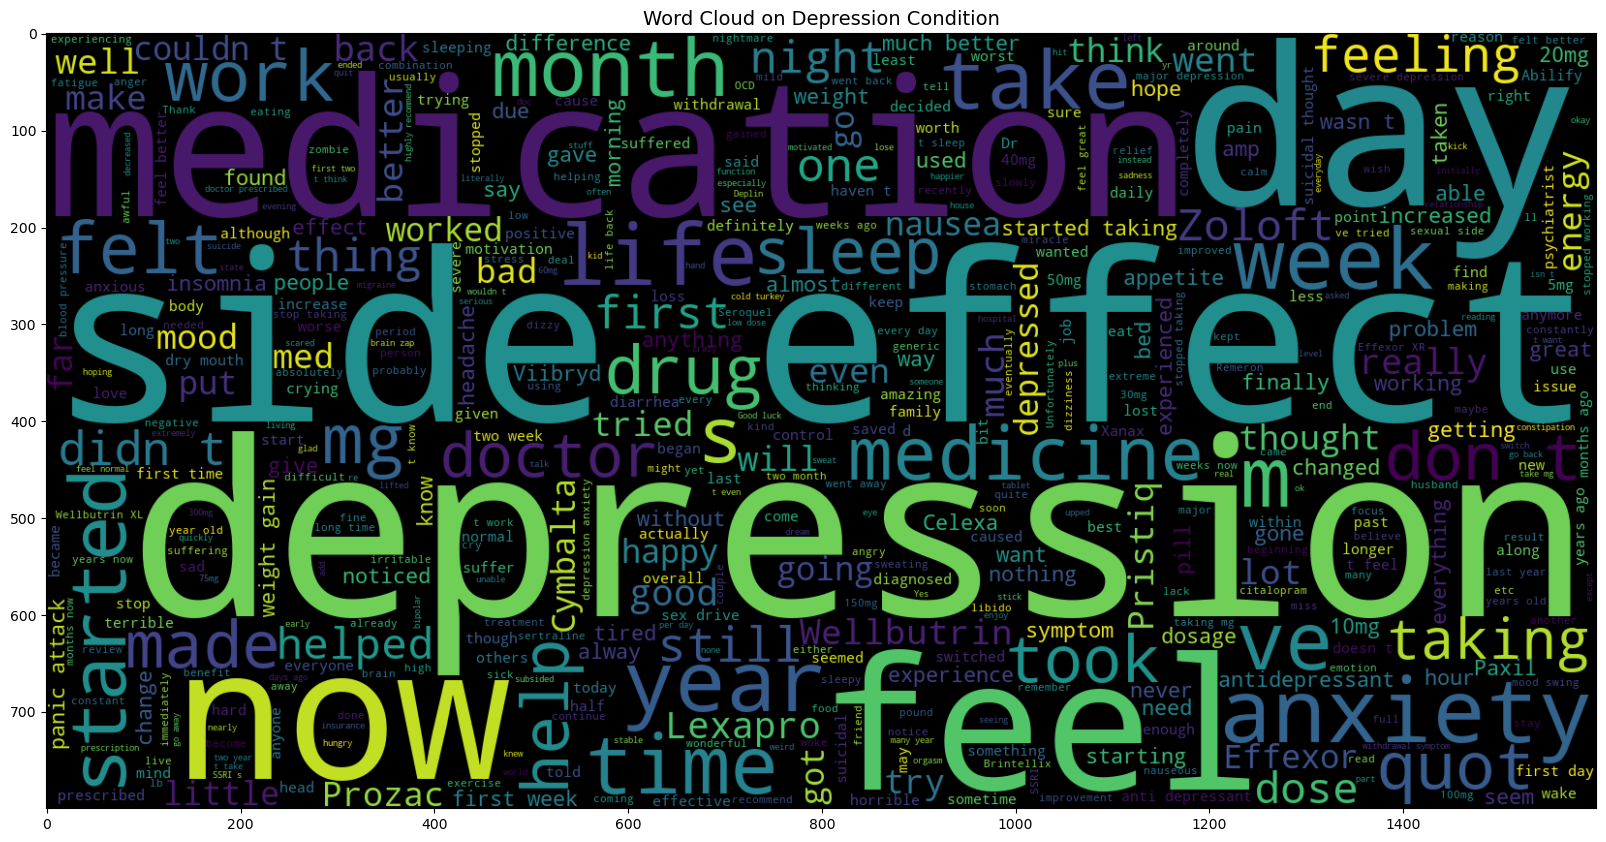

In [20]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(df_condition_depr.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud on Depression Condition', fontsize = 14)